In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('AirQuality.csv', delimiter=';')


In [3]:
# Rename columns if present (optional based on dataset)
df = df.rename(columns={'T': 'Temperature'})
df = df.rename(columns={'RH': 'Relative Humidity'})
df = df.rename(columns={'AH': 'Absolute Humidity'})

In [4]:
# Drop unnamed columns if present
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, errors='ignore')

In [5]:
df['CO(GT)'] = df['CO(GT)'].astype(str).str.replace(',', '.').astype(float)
df['C6H6(GT)'] = df['C6H6(GT)'].astype(str).str.replace(',', '.').astype(float)
df['Temperature'] = df['Temperature'].astype(str).str.replace(',', '.').astype(float)
df['Relative Humidity'] = df['Relative Humidity'].astype(str).str.replace(',', '.').astype(float)
df['Absolute Humidity'] = df['Absolute Humidity'].astype(str).str.replace(',', '.').astype(float)

In [6]:
df = df.drop_duplicates()


     

# Fill numeric NaNs with mean
df = df.fillna(df.mean(numeric_only=True))

In [7]:
df = df.dropna()

In [8]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Temperature,Relative Humidity,Absolute Humidity
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [9]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['yearr'] = df['Year'].astype(str)
df['month'] = df['Month'].astype(str)

In [10]:
# Scale Absolute Humidity
df['Absolute Humidity'] = df['Absolute Humidity'].multiply(100)


     

# Function to remove outliers
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]


     

# Remove outliers from selected columns
cols = ['Temperature', 'Relative Humidity', 'Absolute Humidity',
        'PT08.S4(NO2)', 'PT08.S5(O3)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S1(CO)']
for col in cols:
    df[col] = remove_outliers(df[col])


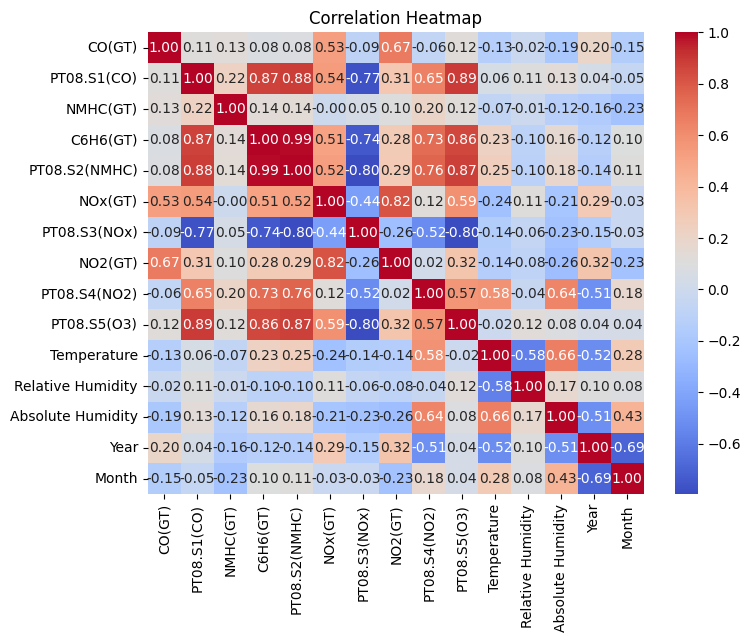

In [11]:
# 1. Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

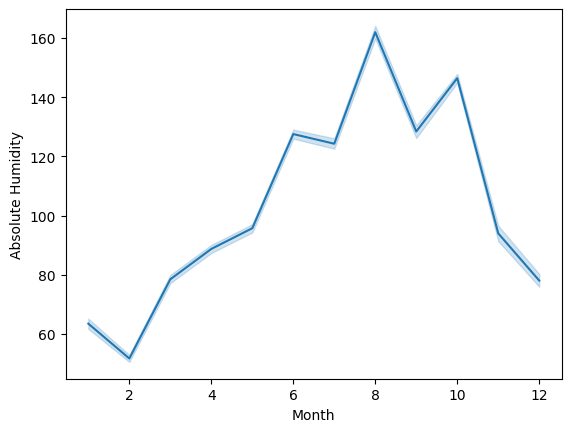

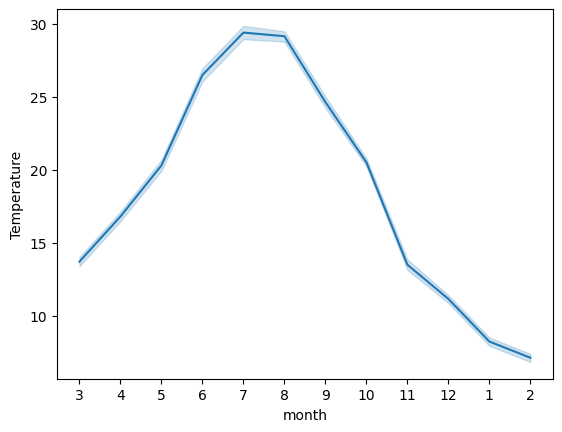

In [12]:
# 2. Line plots
sns.lineplot(df, x='Month', y='Absolute Humidity')
plt.show()
# 2. Line plots
sns.lineplot(df, x='month', y='Temperature')
plt.show()


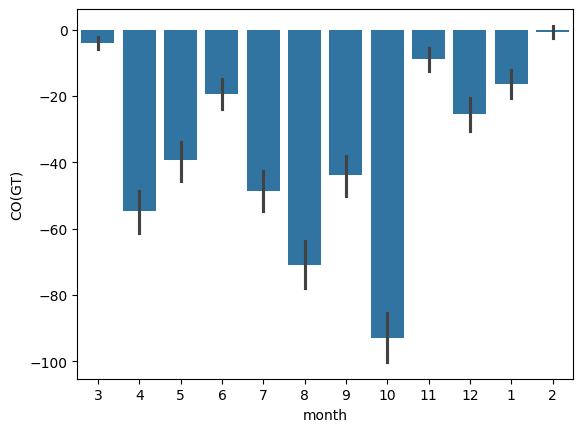

In [13]:
# 3. Bar plot
sns.barplot(df, x='month', y='CO(GT)')
plt.show()

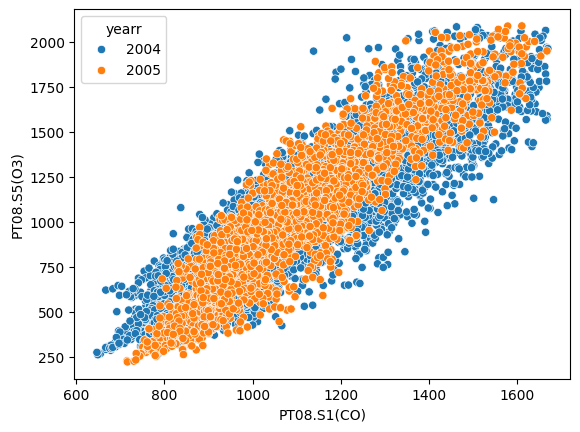

In [14]:
# 4. Scatter plot
sns.scatterplot(df, x='PT08.S1(CO)', y='PT08.S5(O3)', hue='yearr')
plt.show()

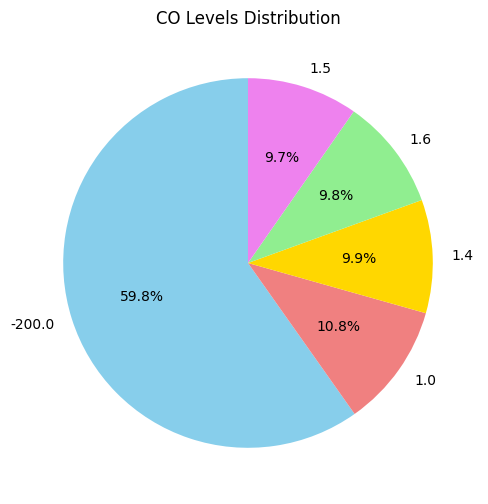

In [15]:
# 5. Pie chart
co_counts = df['CO(GT)'].value_counts().nlargest(5)
plt.figure(figsize=(6, 6))
co_counts.plot.pie(autopct='%1.1f%%', colors=["skyblue", "lightcoral", "gold", "lightgreen", "violet"], startangle=90)
plt.title("CO Levels Distribution")
plt.ylabel("")
plt.show()

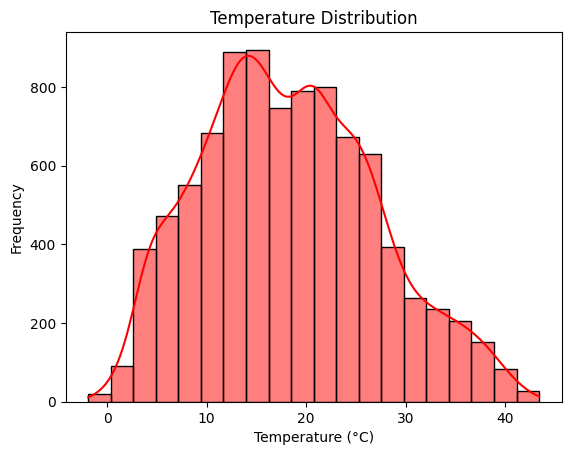

In [16]:
# 6. Histogram
sns.histplot(df['Temperature'], bins=20, kde=True, color='red')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

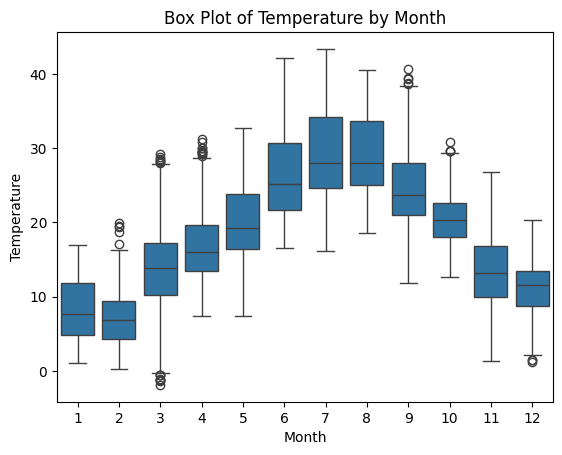

In [17]:
# 8. Box plot
sns.boxplot(data=df, x='Month', y='Temperature')
plt.title('Box Plot of Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()
